In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
import joblib


## connecting to the database

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

In [5]:
import psycopg2
hostname = 'localhost'
database = 'nyfd'
user_name = 'postgres'
pwd = 'raksha' 
port_id= 5432
conn=None
cur=None

In [7]:
engine = create_engine(f'postgresql://{user_name}:{pwd}@{hostname}:{port_id}/{database}')

In [39]:
pd.read_sql_query("SELECT tablename FROM pg_catalog.pg_tables WHERE schemaname = 'public'", con=engine)

,tablename
0,inspection_dc
1,f_eng_col
2,new_features
3,last_inspec
4,PCA
5,insp


In [45]:
sql = 'SELECT * FROM public."PCA"'

In [47]:
model = pd.read_sql_query(sql,engine)

In [49]:
model.sample(5)

,truncatedsvd0,truncatedsvd1,truncatedsvd2,truncatedsvd3,truncatedsvd4,truncatedsvd5,truncatedsvd6,truncatedsvd7,truncatedsvd8,truncatedsvd9,...,truncatedsvd15,truncatedsvd16,truncatedsvd17,truncatedsvd18,truncatedsvd19,truncatedsvd20,truncatedsvd21,truncatedsvd22,truncatedsvd23,target
1195285,0.482680,-0.964468,-0.884613,0.163986,0.849148,0.144695,-0.040887,-0.060621,0.000601,0.077485,...,0.105530,0.028850,0.000379,-0.024122,-0.048936,-0.019571,-0.018231,-0.015481,0.009403,1
565592,1.801600,-0.544827,0.263704,-0.932260,0.337741,0.098664,-0.005810,-0.039119,-0.000650,0.044164,...,-0.280264,-0.482456,-0.670477,-0.290511,-0.194757,-0.060174,-0.070438,-0.078267,-0.031364,1
604018,-1.351488,-0.079412,-0.192664,-0.302961,0.578658,-0.500176,-0.605909,0.633543,0.001853,-0.081827,...,0.006425,0.007053,-0.009052,-0.006419,-0.005276,0.002892,-0.003079,-0.004420,-0.003433,1
666081,-0.096924,0.266131,0.803049,-0.772859,0.416925,-0.463395,-0.574336,0.653540,0.003179,-0.095637,...,0.013557,0.008846,-0.006219,-0.012406,-0.018785,-0.005087,-0.016340,-0.028344,-0.023904,1
640160,2.743582,-0.780738,0.224709,-0.029250,0.855874,0.390251,0.042856,0.043459,0.008013,0.013956,...,-0.018491,-0.016746,0.017458,0.017129,0.027803,0.003113,0.021484,0.040094,0.018205,1


## SPLIT THE DATA

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
def split_data(data):
    return data.copy()
    

In [55]:
mdl = split_data(model)

In [57]:
mdl.sample(5)

,truncatedsvd0,truncatedsvd1,truncatedsvd2,truncatedsvd3,truncatedsvd4,truncatedsvd5,truncatedsvd6,truncatedsvd7,truncatedsvd8,truncatedsvd9,...,truncatedsvd15,truncatedsvd16,truncatedsvd17,truncatedsvd18,truncatedsvd19,truncatedsvd20,truncatedsvd21,truncatedsvd22,truncatedsvd23,target
392369,2.902733,4.912866,-2.131904,-0.921941,0.001617,-0.572832,-0.110888,-0.174427,-0.013820,0.068185,...,-0.283863,-0.365253,0.727270,-0.308769,-0.205403,-0.060917,-0.072673,-0.084651,-0.053843,1
180733,0.458042,0.660704,1.584004,-0.255113,0.617855,-0.175809,-0.025989,-0.075238,-0.001212,0.026717,...,-0.024578,-0.005015,-0.002183,0.000664,0.021714,0.013573,0.009786,0.011061,-0.020533,0
845679,0.496381,-1.118612,-1.100476,-0.259108,0.718472,-0.226364,0.789240,0.296275,0.005327,-0.065811,...,0.010911,-0.001196,0.005042,0.003680,-0.003997,-0.006668,0.000499,0.005820,0.010761,1
122134,1.857114,-0.409981,0.482682,-0.461034,0.578673,0.141888,0.009893,-0.015871,0.001951,0.025605,...,-0.033770,-0.019246,0.009946,0.017370,0.050338,0.015617,0.032433,0.083931,-0.164472,0
712802,0.791337,-0.985427,-0.814048,0.664176,1.231242,-0.075772,0.809733,0.329016,0.011598,-0.071545,...,0.009607,-0.001596,0.009573,0.003494,-0.002892,-0.004073,0.005228,0.013287,0.024398,1


In [59]:
mdl.columns

Index(['truncatedsvd0', 'truncatedsvd1', 'truncatedsvd2', 'truncatedsvd3',
       'truncatedsvd4', 'truncatedsvd5', 'truncatedsvd6', 'truncatedsvd7',
       'truncatedsvd8', 'truncatedsvd9', 'truncatedsvd10', 'truncatedsvd11',
       'truncatedsvd12', 'truncatedsvd13', 'truncatedsvd14', 'truncatedsvd15',
       'truncatedsvd16', 'truncatedsvd17', 'truncatedsvd18', 'truncatedsvd19',
       'truncatedsvd20', 'truncatedsvd21', 'truncatedsvd22', 'truncatedsvd23',
       'target'],
      dtype='object')

In [61]:
mdl.shape

(1309476, 25)

In [73]:
X = mdl.drop(columns=['target'])
y = mdl['target']

In [65]:
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(X)
anomalyscore = iso_forest.decision_function(X).reshape(-1,1)

In [67]:
mdl['anomaly_score'] =  anomalyscore

In [75]:
## splitting into train,val,test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1047580, 25) (1047580,)
(261896, 25) (261896,)


In [77]:
pd.Series(y_train).value_counts()

target
1    925547
0    122033
Name: count, dtype: int64

In [79]:
pd.Series(y_test).value_counts()

target
1    231388
0     30508
Name: count, dtype: int64

- FIXING `CLASS IMBALANCE`

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [63]:
pd.Series(y_resampled_smote).value_counts()

1    926523
0    926523
Name: count, dtype: int64

## MODEL SELECTION

In [83]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import lightgbm as lgb
from catboost import CatBoostClassifier

In [85]:
algorithms = {
    'CAT MODEL': CatBoostClassifier(random_state=102,auto_class_weights='Balanced', verbose=0),
    'XGBOOST CLASSIFIER': XGBClassifier(random_state=102,
                                       learning_rate=0.01,
                                       n_estimators=1000,
                                       max_depth=7,
                                       min_child_weight=1,
                                       gamma=0.1,
                                       subsample=0.8,
                                       colsample_bytree=0.8,
                                       objective='binary:logistic',
                                       nthread=4,
                                       seed=42,
                                       use_label_encoder=False),
    'LGB': lgb.LGBMClassifier(random_state=102,
                              num_leaves=31,
                              learning_rate=0.01,
                              n_estimators=100,
                              class_weight=None),
    'logistic regression': LogisticRegression(class_weight='balanced', random_state=102),
    'random_forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=102),
    'Gradient Boosting with SMOTE': ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100,
                                          learning_rate=0.1,
                                          max_depth=4,
                                          subsample=0.9,
                                          min_samples_split=5,
                                          min_samples_leaf=2,
                                          random_state=42))
    ])
}

In [87]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [89]:
def plot_learning_curves(name, algorithm, figsize=(12, 4),fit_params={}):
	train_sizes, train_scores, test_scores = learning_curve(
		estimator=algorithm,
		X=X_resampled_smote,
		y=y_resampled_smote,
		cv=3,
		scoring="accuracy",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="Accuracy", title=name)

	ax.legend(loc="lower right")

	plt.show()

C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\catboost\core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED

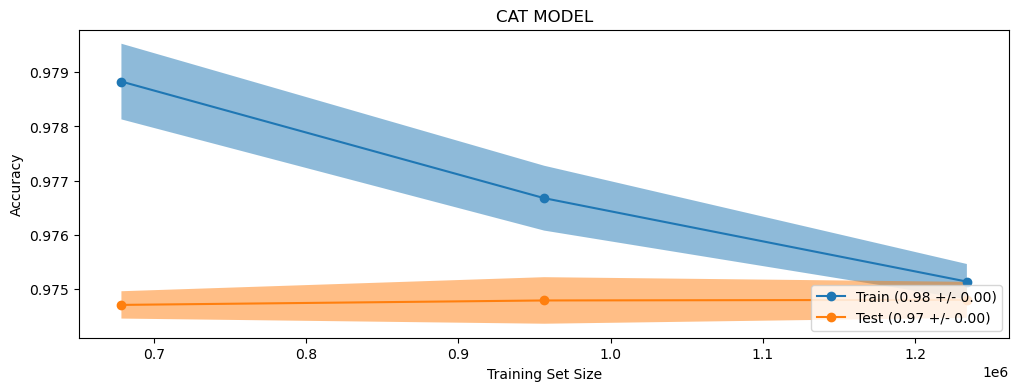

C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    raise ValueError(
ValueE

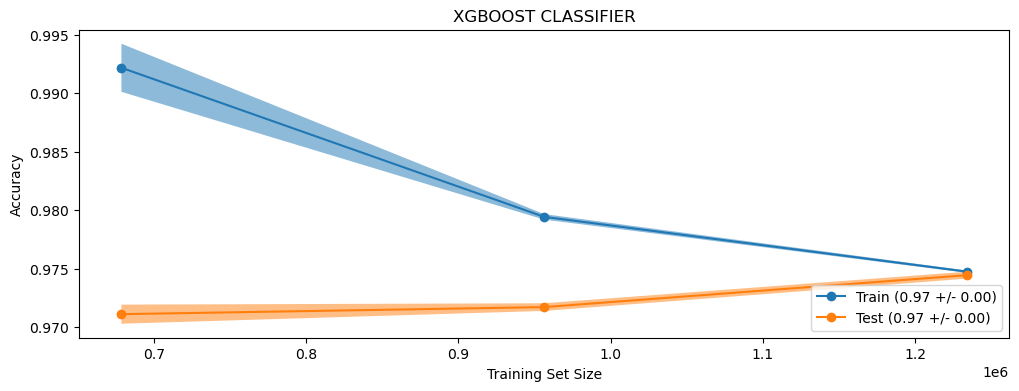

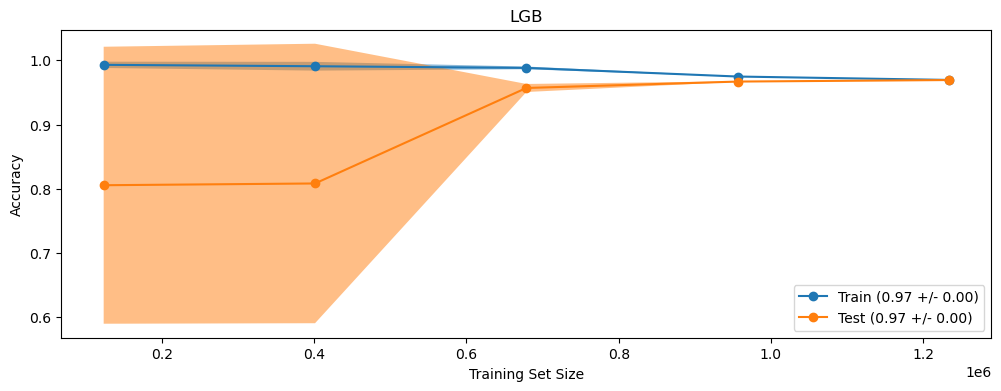

C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\linear_mod

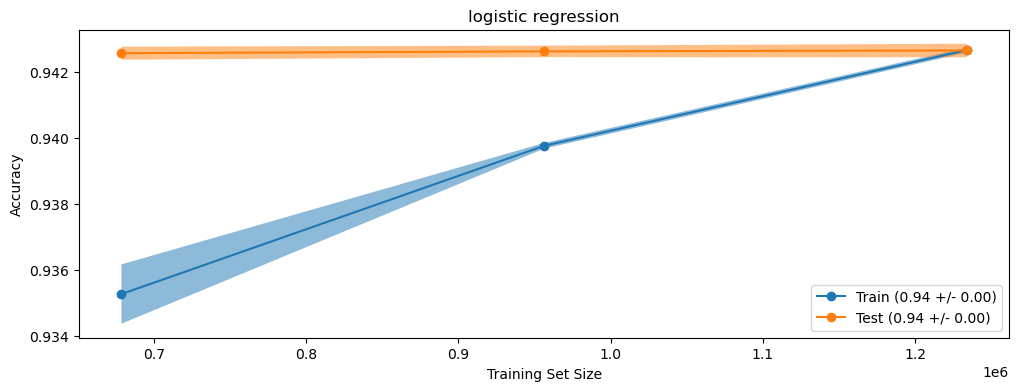

KeyboardInterrupt: 

In [96]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

## MODEL EVALUATION

In [93]:
from sklearn.metrics import classification_report, roc_auc_score

def model_eval(X, y, X_test, y_test, models):
    reports = {}
    for i, model in enumerate(models):
        model.fit(X, y)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        reports[f'model_{i}'] = {
            'classification_report': classification_report(y_test, y_pred, zero_division=0),
            'roc_auc': auc
        }
    return reports

for name, alg in algorithms.items():
    reports = model_eval(X_resampled_smote, y_resampled_smote, X_test, y_test, [alg])
    print(f"Classification Report for {name}:")
    print(reports[f'model_0']['classification_report'])
    print(f"ROC AUC: {reports[f'model_0']['roc_auc']:.4f}")
    print("\n")

Classification Report for CAT MODEL:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     30508
           1       1.00      0.98      0.99    231388

    accuracy                           0.98    261896
   macro avg       0.93      0.98      0.95    261896
weighted avg       0.98      0.98      0.98    261896

ROC AUC: 0.9986


Classification Report for XGBOOST CLASSIFIER:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     30508
           1       1.00      0.98      0.99    231388

    accuracy                           0.98    261896
   macro avg       0.94      0.98      0.96    261896
weighted avg       0.98      0.98      0.98    261896

ROC AUC: 0.9986


[LightGBM] [Info] Number of positive: 925547, number of negative: 925547
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191544 seconds.
You can set `force_col_wise=true` to remove the ov

KeyboardInterrupt: 

- WE CAN FINALIZE `XGBOOST CLASSIFIER`

## FINAL MODEL

In [119]:
model = Pipeline(steps=[
    ('XGBOOST', XGBClassifier(
        random_state=102,
        learning_rate=0.01,
        n_estimators=1000,
        max_depth=7,
        min_child_weight=1,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        seed=42,
        use_label_encoder=False
    ))
])

In [123]:
model.fit(X_resampled_smote, y_resampled_smote)

Pipeline(steps=[('XGBOOST',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

## MODEL PERSISTENCE

In [125]:
joblib.dump(model, "model.joblib")

['model.joblib']

In [127]:
saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('XGBOOST',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

In [135]:
from sklearn.metrics import f1_score
y_pred = saved_model.predict(X_test)
f1_score(y_test, y_pred)

0.9891071234366503